In [1]:
import torch
from torchvision import transforms

from PIL import Image

from glob import glob

from unet import UNet

import pickle

from tqdm import tqdm

/home/kdhsimplepro/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device("cuda")
model = UNet().to(device)

In [3]:
with open("/home/kdhsimplepro/kdhsimplepro/AI/BirdAugmentation/BirdSegmentation/trainer_data.pickle", "rb") as f:
    trainer_data = pickle.load(f)
    
model.load_state_dict(trainer_data["best_state_dict"])

<All keys matched successfully>

In [4]:
model.eval()

UNet(
  (encoder): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
      (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): LeakyReLU(negative_slope=0.01)
    )
    (1): Sequential(
      (0): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): LeakyReLU(negative_slope=0.01)
    )
    (2): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(

In [8]:
import os

root_dir = '/home/kdhsimplepro/kdhsimplepro/AI/BirdAugmentation/'

crow_paths = glob(os.path.join(root_dir, "crawling_dataset", "crow", "obj_train_data", "*.jpg"))
cuckoo_paths = glob(os.path.join(root_dir, "crawling_dataset", "cuckoo", "obj_train_data", "*.jpg"))
sparrow_paths = glob(os.path.join(root_dir, "crawling_dataset", "sparrow", "obj_train_data", "*.jpg"))
swallow_paths = glob(os.path.join(root_dir, "crawling_dataset", "swallow", "obj_train_data", "*.jpg"))
woodpecker_paths = glob(os.path.join(root_dir, "crawling_dataset", "woodpecker", "obj_train_data", "*.jpg"))

print(len(crow_paths), len(cuckoo_paths), len(sparrow_paths), len(swallow_paths), len(woodpecker_paths))

252 383 224 149 208


In [9]:
crow_images = torch.zeros((len(crow_paths), 3, 256, 256))
cuckoo_images = torch.zeros((len(cuckoo_paths), 3, 256, 256))
sparrow_images = torch.zeros((len(sparrow_paths), 3, 256, 256))
swallow_images = torch.zeros((len(swallow_paths), 3, 256, 256))
woodpecker_images = torch.zeros((len(woodpecker_paths), 3, 256, 256))

print(crow_images.shape, cuckoo_images.shape, sparrow_images.shape, swallow_images.shape, woodpecker_images.shape)

torch.Size([252, 3, 256, 256]) torch.Size([383, 3, 256, 256]) torch.Size([224, 3, 256, 256]) torch.Size([149, 3, 256, 256]) torch.Size([208, 3, 256, 256])


In [10]:
for i in range(len(crow_images)):
    crow_images[i] = transforms.ToTensor()(Image.open(crow_paths[i]).resize((256, 256)).convert("RGB"))

for i in range(len(cuckoo_images)):
    cuckoo_images[i] = transforms.ToTensor()(Image.open(cuckoo_paths[i]).resize((256, 256)).convert("RGB"))

for i in range(len(sparrow_images)):
    sparrow_images[i] = transforms.ToTensor()(Image.open(sparrow_paths[i]).resize((256, 256)).convert("RGB"))

for i in range(len(swallow_images)):
    swallow_images[i] = transforms.ToTensor()(Image.open(swallow_paths[i]).resize((256, 256)).convert("RGB"))

for i in range(len(woodpecker_images)):
    woodpecker_images[i] = transforms.ToTensor()(Image.open(woodpecker_paths[i]).resize((256, 256)).convert("RGB"))

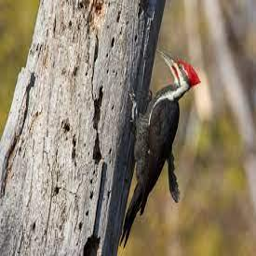

In [11]:
transforms.ToPILImage()(woodpecker_images[-1])

In [12]:
with torch.no_grad():
    predicted_crow = model(crow_images.to(device))
    predicted_cuckoo = model(cuckoo_images.to(device))
    predicted_sparrow = model(sparrow_images.to(device))
    predicted_swallow = model(swallow_images.to(device))
    predicted_woodpecker = model(woodpecker_images.to(device))

In [13]:
print(predicted_crow.shape, predicted_cuckoo.shape, predicted_sparrow.shape, predicted_swallow.shape, predicted_woodpecker.shape)

torch.Size([252, 1, 256, 256]) torch.Size([383, 1, 256, 256]) torch.Size([224, 1, 256, 256]) torch.Size([149, 1, 256, 256]) torch.Size([208, 1, 256, 256])


In [14]:
for i, mask in enumerate(predicted_crow.detach().cpu()):
    img = transforms.ToPILImage()(mask)
    img.save(os.path.join(root_dir, "BirdSegmentation", "mask_crawling_images", "crow", f"{i}.jpg"))

for i, mask in enumerate(predicted_cuckoo.detach().cpu()):
    img = transforms.ToPILImage()(mask)
    img.save(os.path.join(root_dir, "BirdSegmentation", "mask_crawling_images", "cuckoo", f"{i}.jpg"))

for i, mask in enumerate(predicted_sparrow.detach().cpu()):
    img = transforms.ToPILImage()(mask)
    img.save(os.path.join(root_dir, "BirdSegmentation", "mask_crawling_images", "sparrow", f"{i}.jpg"))

for i, mask in enumerate(predicted_swallow.detach().cpu()):
    img = transforms.ToPILImage()(mask)
    img.save(os.path.join(root_dir, "BirdSegmentation", "mask_crawling_images", "swallow", f"{i}.jpg"))

for i, mask in enumerate(predicted_woodpecker.detach().cpu()):
    img = transforms.ToPILImage()(mask)
    img.save(os.path.join(root_dir, "BirdSegmentation", "mask_crawling_images", "woodpecker", f"{i}.jpg"))

In [16]:
for i, combine_tensor in enumerate(predicted_crow.detach().cpu() * crow_images):
    img = transforms.ToPILImage()(combine_tensor)
    img.save(os.path.join(root_dir, "BirdSegmentation", "combine_mask_crawling_images", "crow", f"{i}.jpg"))

for i, combine_tensor in enumerate(predicted_cuckoo.detach().cpu() * cuckoo_images):
    img = transforms.ToPILImage()(combine_tensor)
    img.save(os.path.join(root_dir, "BirdSegmentation", "combine_mask_crawling_images", "cuckoo", f"{i}.jpg"))

for i, combine_tensor in enumerate(predicted_sparrow.detach().cpu() * sparrow_images):
    img = transforms.ToPILImage()(combine_tensor)
    img.save(os.path.join(root_dir, "BirdSegmentation", "combine_mask_crawling_images", "sparrow", f"{i}.jpg"))

for i, combine_tensor in enumerate(predicted_swallow.detach().cpu() * swallow_images):
    img = transforms.ToPILImage()(combine_tensor)
    img.save(os.path.join(root_dir, "BirdSegmentation", "combine_mask_crawling_images", "swallow", f"{i}.jpg"))

for i, combine_tensor in enumerate(predicted_woodpecker.detach().cpu() * woodpecker_images):
    img = transforms.ToPILImage()(combine_tensor)
    img.save(os.path.join(root_dir, "BirdSegmentation", "combine_mask_crawling_images", "woodpecker", f"{i}.jpg"))